## ISI Epilepsy Brno & Montreal Dataframes EDA

<u>**Goal:**</u> Conduct an exploratory data analysis 

17/8/2022

---

In [2]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# Import dataset

epilepsy = pd.read_csv('/Users/marek/Desktop/Marek/Jobs/ISI/Work/data/isi_data.csv')
# Remove unnamed column: ,index_col=0
epilepsy.head()

,Unnamed: 0,patient_id,channel_name,resected,structure,onset_channel,pathology,outcome,HFO_65.0-80.0,HFO_80.0-250.0,...,coherence_80.0-250.0,lin_corr_median_250.0-600.0,ren_250.0-600.0,phase_sync_250.0-600.0,phase_const_250.0-600.0,pli_250.0-600.0,pli_tau_250.0-600.0,coherence_250.0-600.0,segm_type,segm_number
0,0,583,ra1,0,NaN,NON_SOZ,normal,11.0,0,11,...,0.997413,0.990955,0.004121,0.970733,1.0,0.815222,-0.146667,0.994151,0,0
1,1,583,ra2,0,NaN,NON_SOZ,normal,11.0,0,16,...,0.998458,0.993981,0.002847,0.979349,1.0,0.841924,-0.113333,0.996071,0,0
2,2,583,ra3,0,NaN,NON_SOZ,normal,11.0,0,20,...,0.999506,0.996993,0.001647,0.987957,1.0,0.857311,-0.043333,0.997980,0,0
3,3,583,ra4,0,NaN,NON_SOZ,normal,11.0,0,27,...,0.999126,0.995900,0.002311,0.986385,1.0,0.852814,-0.036667,0.997646,0,0
4,4,583,ra5,0,NaN,NON_SOZ,normal,11.0,0,11,...,0.997734,0.995822,0.002367,0.986189,1.0,0.861413,-0.058333,0.997589,0,0


In [4]:
# Drop index column

epilepsy = epilepsy.loc[:, ~epilepsy.columns.str.contains('^Unnamed')]
epilepsy.head()

,patient_id,channel_name,resected,structure,onset_channel,pathology,outcome,HFO_65.0-80.0,HFO_80.0-250.0,HFO_250.0-600.0,...,coherence_80.0-250.0,lin_corr_median_250.0-600.0,ren_250.0-600.0,phase_sync_250.0-600.0,phase_const_250.0-600.0,pli_250.0-600.0,pli_tau_250.0-600.0,coherence_250.0-600.0,segm_type,segm_number
0,583,ra1,0,NaN,NON_SOZ,normal,11.0,0,11,34,...,0.997413,0.990955,0.004121,0.970733,1.0,0.815222,-0.146667,0.994151,0,0
1,583,ra2,0,NaN,NON_SOZ,normal,11.0,0,16,40,...,0.998458,0.993981,0.002847,0.979349,1.0,0.841924,-0.113333,0.996071,0,0
2,583,ra3,0,NaN,NON_SOZ,normal,11.0,0,20,35,...,0.999506,0.996993,0.001647,0.987957,1.0,0.857311,-0.043333,0.997980,0,0
3,583,ra4,0,NaN,NON_SOZ,normal,11.0,0,27,37,...,0.999126,0.995900,0.002311,0.986385,1.0,0.852814,-0.036667,0.997646,0,0
4,583,ra5,0,NaN,NON_SOZ,normal,11.0,0,11,58,...,0.997734,0.995822,0.002367,0.986189,1.0,0.861413,-0.058333,0.997589,0,0


In [5]:
# Remove unnecessary columns

epilepsy = epilepsy.drop(['structure'], axis=1)
epilepsy.head()

,patient_id,channel_name,resected,onset_channel,pathology,outcome,HFO_65.0-80.0,HFO_80.0-250.0,HFO_250.0-600.0,spike_rate,...,coherence_80.0-250.0,lin_corr_median_250.0-600.0,ren_250.0-600.0,phase_sync_250.0-600.0,phase_const_250.0-600.0,pli_250.0-600.0,pli_tau_250.0-600.0,coherence_250.0-600.0,segm_type,segm_number
0,583,ra1,0,NON_SOZ,normal,11.0,0,11,34,22,...,0.997413,0.990955,0.004121,0.970733,1.0,0.815222,-0.146667,0.994151,0,0
1,583,ra2,0,NON_SOZ,normal,11.0,0,16,40,49,...,0.998458,0.993981,0.002847,0.979349,1.0,0.841924,-0.113333,0.996071,0,0
2,583,ra3,0,NON_SOZ,normal,11.0,0,20,35,61,...,0.999506,0.996993,0.001647,0.987957,1.0,0.857311,-0.043333,0.997980,0,0
3,583,ra4,0,NON_SOZ,normal,11.0,0,27,37,66,...,0.999126,0.995900,0.002311,0.986385,1.0,0.852814,-0.036667,0.997646,0,0
4,583,ra5,0,NON_SOZ,normal,11.0,0,11,58,63,...,0.997734,0.995822,0.002367,0.986189,1.0,0.861413,-0.058333,0.997589,0,0


In [6]:
# Split epilepsy dataset to Montreal & Brno dataframe

df_montreal, df_brno = [x for _, x in epilepsy.groupby(epilepsy['patient_id'] < 100)]

In [7]:
# Show Brno dataframe

df_brno.head()

,patient_id,channel_name,resected,onset_channel,pathology,outcome,HFO_65.0-80.0,HFO_80.0-250.0,HFO_250.0-600.0,spike_rate,...,coherence_80.0-250.0,lin_corr_median_250.0-600.0,ren_250.0-600.0,phase_sync_250.0-600.0,phase_const_250.0-600.0,pli_250.0-600.0,pli_tau_250.0-600.0,coherence_250.0-600.0,segm_type,segm_number
2723,59,c'1,0,NON_SOZ,normal,31.0,0,1,0,1,...,0.85799,0.242008,0.042108,0.195079,0.0,0.0,0.0,0.762719,0,0
2724,59,c'10,0,NON_SOZ,normal,31.0,0,17,2,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2725,59,c'11,0,NON_SOZ,normal,31.0,0,4,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2726,59,c'12,0,NON_SOZ,normal,31.0,0,2,1,21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2727,59,c'13,0,NON_SOZ,normal,31.0,0,12,17,31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [8]:
# Show unique Brno patient_id

df_brno.patient_id.unique()

array([59, 61, 63, 66, 67, 69, 71, 73, 74, 77, 80, 81, 82, 84, 88, 89, 90,
       92, 93], dtype=int64)

In [9]:
# Number of patients in Brno

df_brno['patient_id'].nunique()

19

In [10]:
# Number of entries per patient in Brno

df_brno['patient_id'].value_counts().sort_index()

59    2496
61    2416
63    1920
66    2800
67    2464
69    2720
71    2704
73    2816
74    2784
77    2688
80    2624
81    2624
82    1360
84    2768
88    2800
89    2720
90    2816
92    2816
93    2560
Name: patient_id, dtype: int64

In [11]:
# Unique value of outcome per patient in Brno

outcomes_brno = df_brno.groupby(['patient_id'])['outcome'].unique().sort_index()
outcomes_brno

patient_id
59    [31.0]
61    [11.0]
63    [11.0]
66    [41.0]
67    [42.0]
69    [31.0]
71    [11.0]
73    [31.0]
74    [22.0]
77    [11.0]
80    [31.0]
81    [31.0]
82    [11.0]
84    [12.0]
88    [21.0]
89    [11.0]
90    [31.0]
92    [31.0]
93    [11.0]
Name: outcome, dtype: object

In [12]:
# Values & counts of outcomes in Brno

values_brno, counts_brno = np.unique(outcomes_brno, return_counts=True)
values_brno, counts_brno

(array([array([11.]), array([12.]), array([21.]), array([22.]),
        array([31.]), array([41.]), array([42.])], dtype=object),
 array([7, 1, 1, 1, 7, 1, 1], dtype=int64))

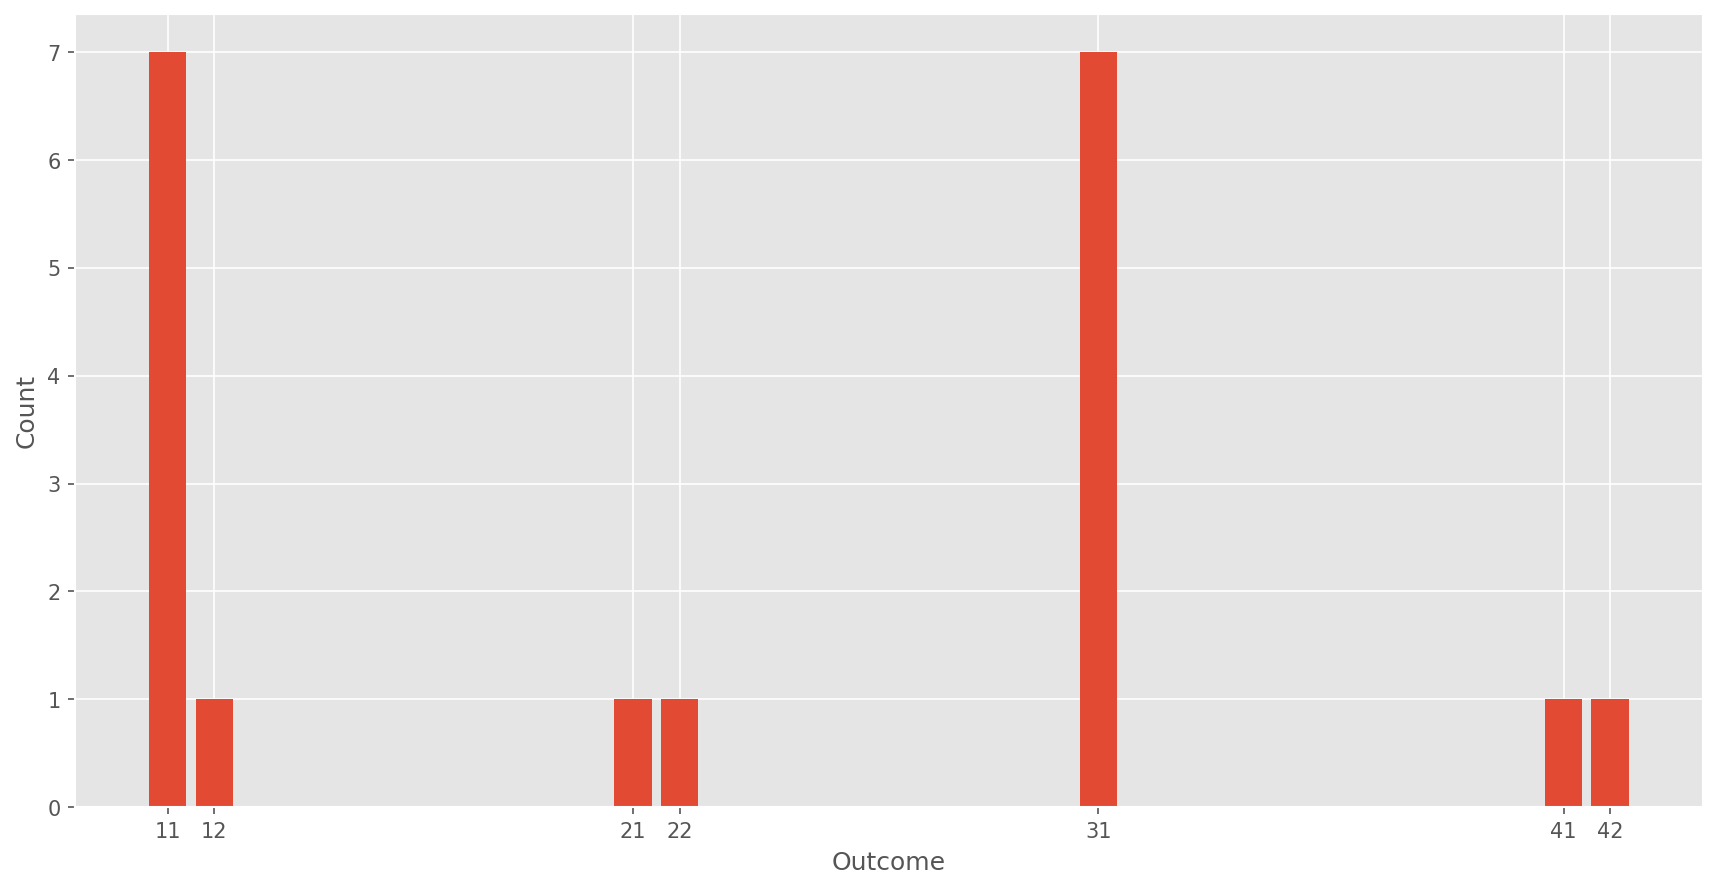

In [14]:
# Show count of outcomes in Brno 

plt.bar(values_brno, counts_brno)
plt.style.use('ggplot')
plt.xticks([11,12,21,22,31,41,42])
plt.rcParams['figure.figsize'] = [14, 7]
plt.rcParams['figure.dpi'] = 150
plt.ylabel("Count")
plt.xlabel("Outcome");

In [16]:
# Unique value of electrod's contacts per patient in Brno

channels_brno = df_brno.groupby(['patient_id'])['channel_name'].unique().sort_index()
channels_brno

patient_id
59    [c'1, c'10, c'11, c'12, c'13, c'14, c'15, c'16...
61    [a'1, a'10, a'2, a'3, a'4, a'6, a'7, a'8, a'9,...
63    [b'1, b'10, b'11, b'12, b'2, b'3, b'4, b'5, b'...
66    [a1, a10, a11, a12, a13, a14, a15, a2, a3, a4,...
67    [d1, d10, d2, d3, d4, d5, d6, d7, d8, d9, g1, ...
69    [a'1, a'10, a'11, a'12, a'13, a'14, a'15, a'2,...
71    [a'1, a'10, a'11, a'12, a'2, a'3, a'4, a'5, a'...
73    [b'1, b'10, b'11, b'12, b'13, b'14, b'15, b'2,...
74    [a'1, a'10, a'11, a'12, a'13, a'14, a'15, a'2,...
77    [b'1, b'10, b'11, b'12, b'13, b'14, b'15, b'2,...
80    [a'1, a'10, a'11, a'12, a'13, a'14, a'15, a'2,...
81    [g1, g10, g11, g12, g2, g3, g4, g5, g6, g7, g8...
82    [b1, b10, b11, b12, b13, b14, b15, b2, b3, b4,...
84    [a'1, a'10, a'11, a'12, a'2, a'3, a'4, a'5, a'...
88    [b'1, b'10, b'12, b'2, b'3, b'4, b'5, b'6, b'7...
89    [b'1, b'10, b'11, b'12, b'13, b'14, b'15, b'2,...
90    [a'1, a'10, a'11, a'12, a'13, a'14, a'15, a'2,...
92    [b'1, b'11, b'12, b'13, b'14, b

In [17]:
# Number of electrode's contacts per patient 

electrod_contacts = len(channels_brno[59]),len(channels_brno[61]),len(channels_brno[63]),len(channels_brno[66]), len(channels_brno[67]), len(channels_brno[69]),len(channels_brno[71]),len(channels_brno[73]),len(channels_brno[74]),len(channels_brno[77]),len(channels_brno[80]),len(channels_brno[81]),len(channels_brno[82]),len(channels_brno[84]),len(channels_brno[88]), len(channels_brno[89]),len(channels_brno[90]),len(channels_brno[92]),len(channels_brno[93])          
electrod_contacts 

(156,
 151,
 120,
 175,
 154,
 170,
 169,
 176,
 174,
 168,
 164,
 164,
 85,
 173,
 175,
 170,
 176,
 176,
 160)

In [18]:
# Average value of electrod's contacts

from numpy import mean
mean(electrod_contacts).round(2)

160.84

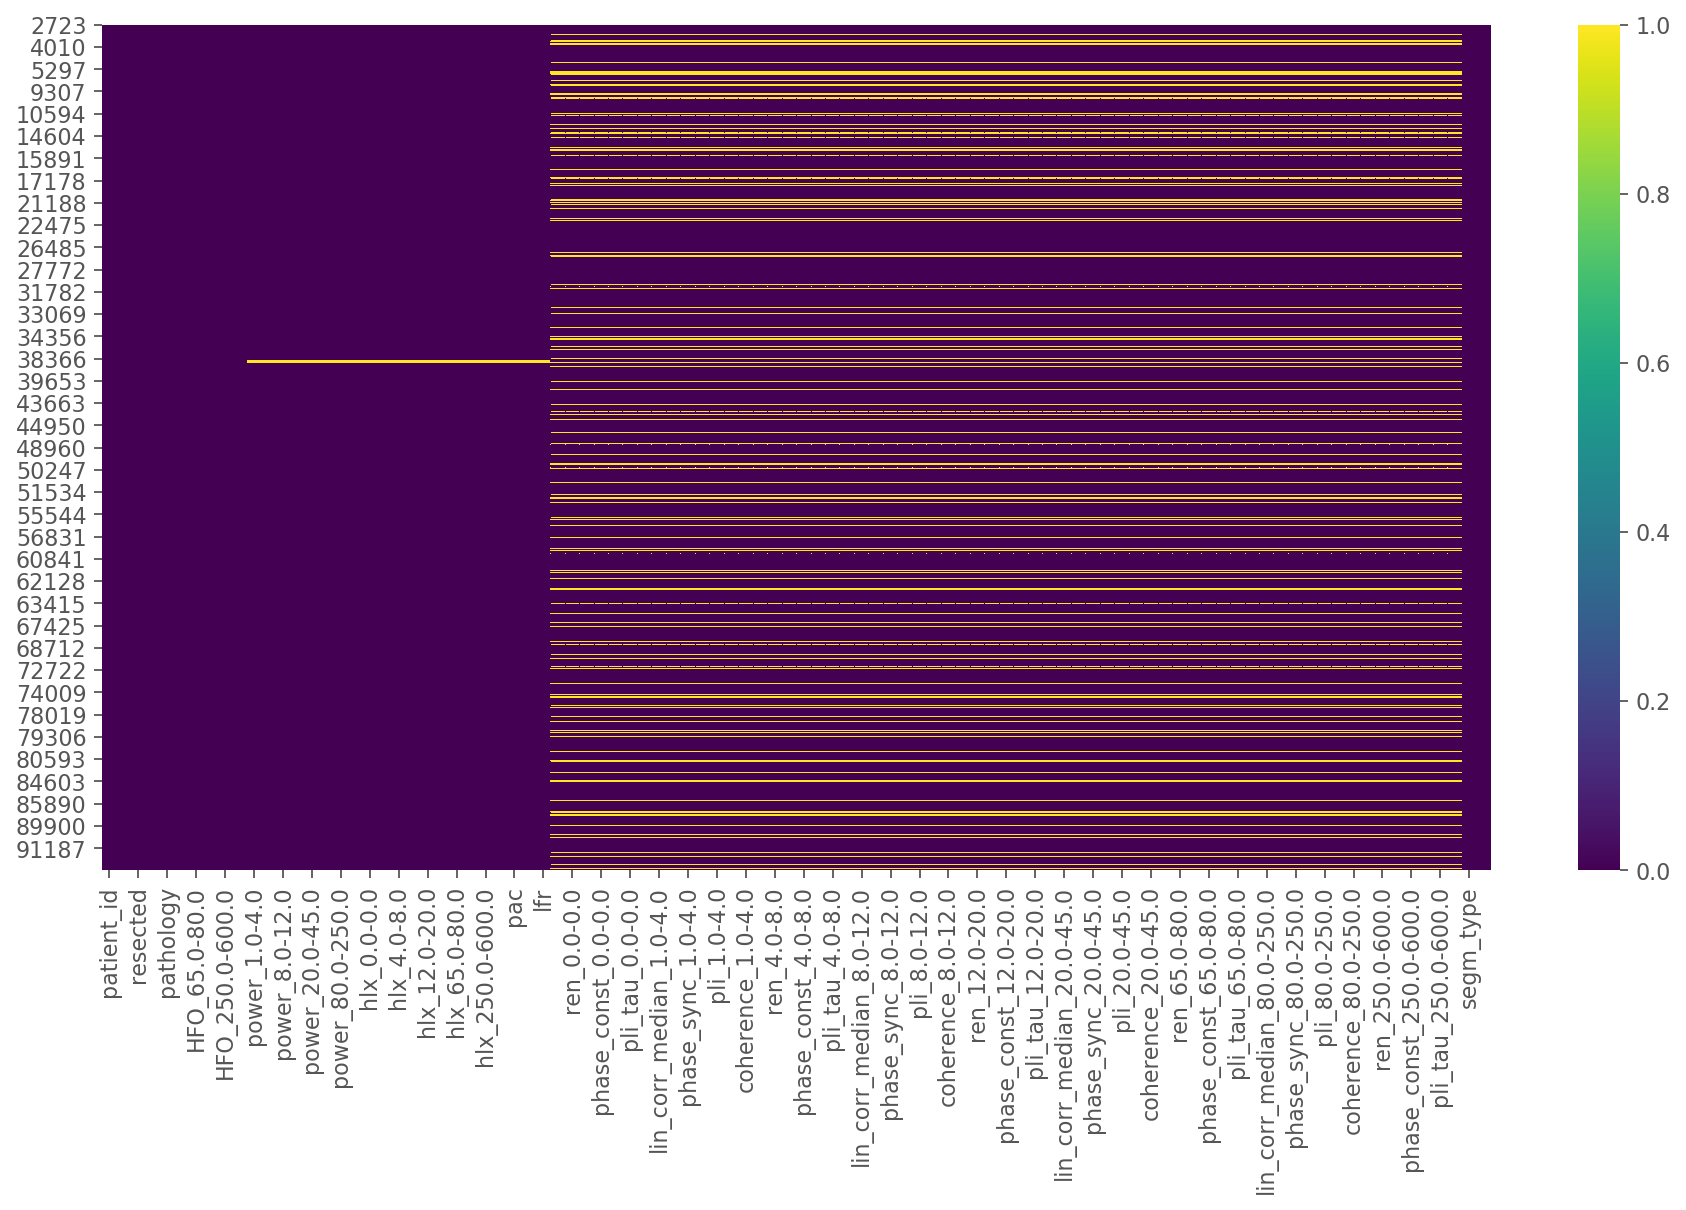

In [19]:
# Show null columns

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [14, 7]
plt.rcParams['figure.dpi'] = 160
sns.heatmap(df_brno.isnull(), cmap = 'viridis', cbar = True);

In [20]:
# Show Montreal dataframe

df_montreal.head()

,patient_id,channel_name,resected,onset_channel,pathology,outcome,HFO_65.0-80.0,HFO_80.0-250.0,HFO_250.0-600.0,spike_rate,...,coherence_80.0-250.0,lin_corr_median_250.0-600.0,ren_250.0-600.0,phase_sync_250.0-600.0,phase_const_250.0-600.0,pli_250.0-600.0,pli_tau_250.0-600.0,coherence_250.0-600.0,segm_type,segm_number
0,583,ra1,0,NON_SOZ,normal,11.0,0,11,34,22,...,0.997413,0.990955,0.004121,0.970733,1.0,0.815222,-0.146667,0.994151,0,0
1,583,ra2,0,NON_SOZ,normal,11.0,0,16,40,49,...,0.998458,0.993981,0.002847,0.979349,1.0,0.841924,-0.113333,0.996071,0,0
2,583,ra3,0,NON_SOZ,normal,11.0,0,20,35,61,...,0.999506,0.996993,0.001647,0.987957,1.0,0.857311,-0.043333,0.997980,0,0
3,583,ra4,0,NON_SOZ,normal,11.0,0,27,37,66,...,0.999126,0.995900,0.002311,0.986385,1.0,0.852814,-0.036667,0.997646,0,0
4,583,ra5,0,NON_SOZ,normal,11.0,0,11,58,63,...,0.997734,0.995822,0.002367,0.986189,1.0,0.861413,-0.058333,0.997589,0,0


In [21]:
# Show unique Montreal patient_id

df_montreal.patient_id.unique()

array([ 583,  705,  657,  756,  777, 1299, 1446,  761, 1162,  953,  965,
       1002,  873, 1020, 1021, 1029, 1149, 1041, 1159, 1142, 1247, 1233,
        723, 1153, 1246,  617,  909, 1016, 1043,  717,  473, 1218, 1630,
       1718], dtype=int64)

In [22]:
# Number of patients in Montreal

df_montreal['patient_id'].nunique()

34

In [23]:
# Number of entries per patient in Montreal

df_montreal['patient_id'].value_counts().sort_index()

473     1136
583     1392
617      880
657      720
705     1360
717     1136
723     1376
756      912
761     1840
777      576
873     1392
909     1008
953     1408
965     1376
1002    1072
1016    1600
1020     800
1021     944
1029    1456
1041    1712
1043    1136
1142    1408
1149     912
1153    1648
1159    1152
1162     784
1218    1600
1233     848
1246    1744
1247    1392
1299    1232
1446     800
1630    2736
1718    2080
Name: patient_id, dtype: int64

In [24]:
# Unique value of outcome per patient in Montreal

outcomes_montreal = df_montreal.groupby(['patient_id'])['outcome'].unique().sort_index()
outcomes_montreal

patient_id
473     [31.0]
583     [11.0]
617     [31.0]
657     [11.0]
705     [41.0]
717     [11.0]
723     [11.0]
756     [22.0]
761     [41.0]
777     [41.0]
873     [12.0]
909     [32.0]
953     [11.0]
965     [11.0]
1002    [11.0]
1016    [41.0]
1020    [32.0]
1021    [11.0]
1029    [41.0]
1041    [11.0]
1043    [11.0]
1142    [31.0]
1149    [21.0]
1153    [14.0]
1159    [31.0]
1162    [41.0]
1218    [41.0]
1233    [12.0]
1246    [12.0]
1247    [42.0]
1299    [42.0]
1446    [31.0]
1630    [11.0]
1718    [12.0]
Name: outcome, dtype: object

In [25]:
# Values & counts of outcomes in Montreal

values_montreal, counts_montreal = np.unique(outcomes_montreal, return_counts=True)
values_montreal, counts_montreal

(array([array([11.]), array([12.]), array([14.]), array([21.]),
        array([22.]), array([31.]), array([32.]), array([41.]),
        array([42.])], dtype=object),
 array([11,  4,  1,  1,  1,  5,  2,  7,  2], dtype=int64))

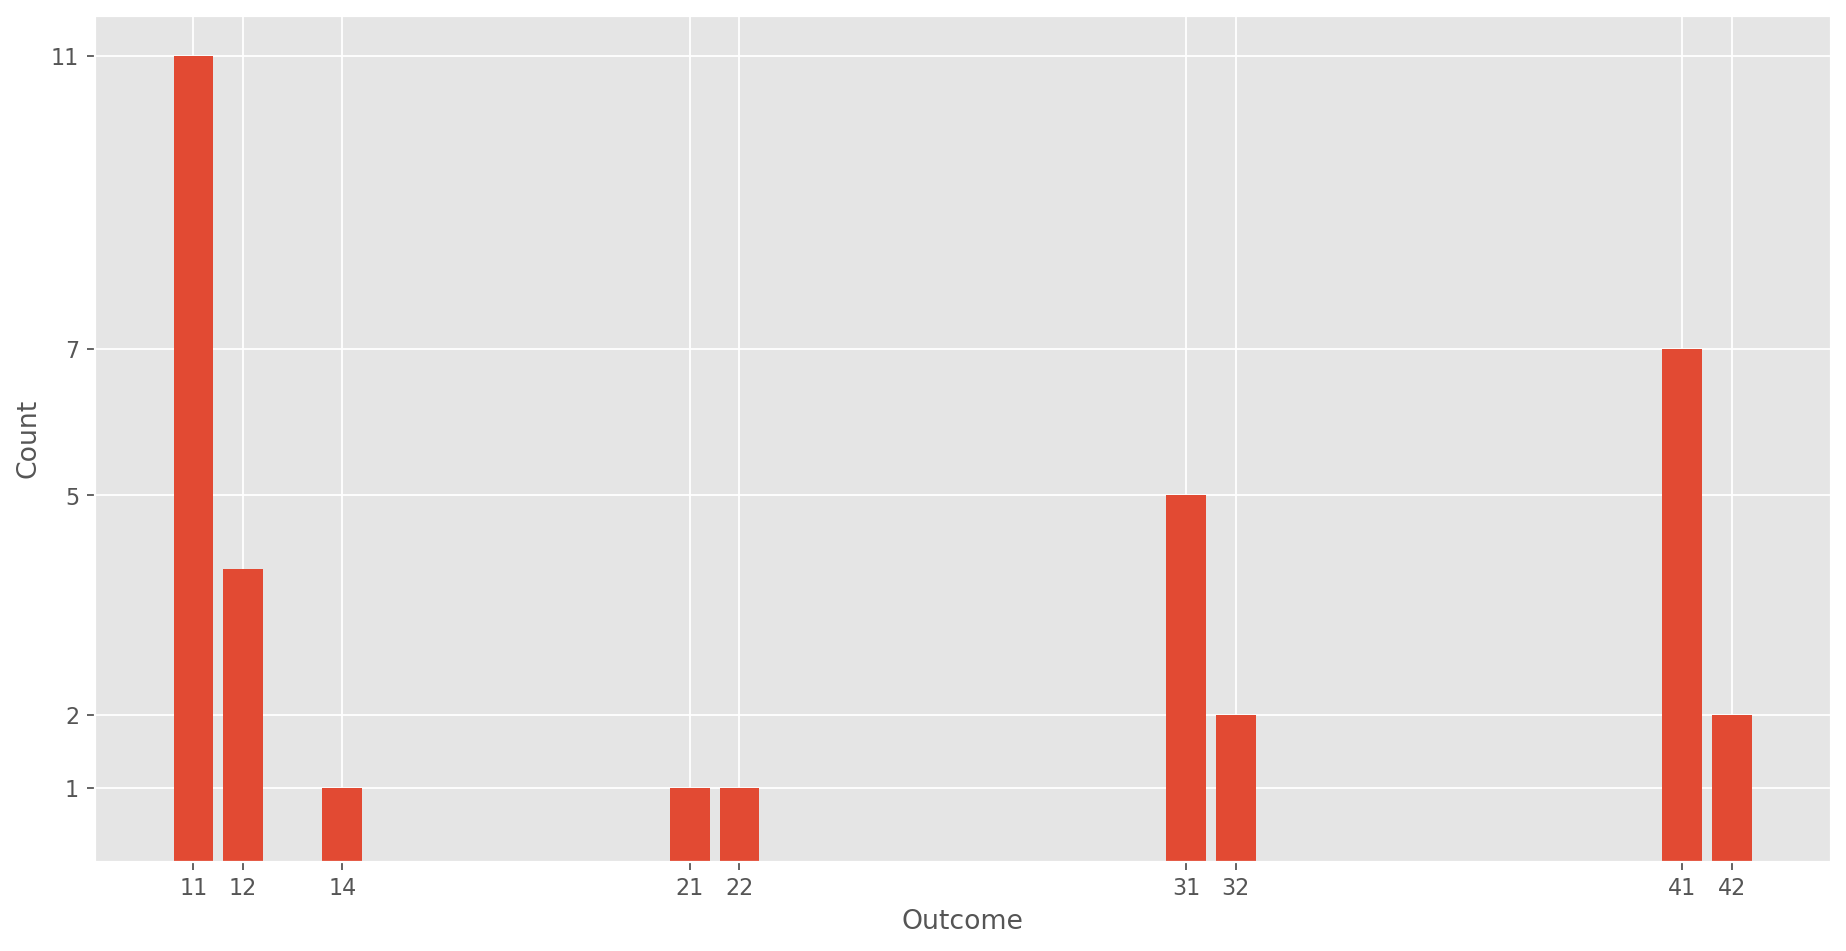

In [26]:
# Show count of outcomes in Montreal

plt.bar(values_montreal, counts_montreal)
plt.style.use('ggplot')
plt.xticks([11,12,14,21,22,31,32,41,42])
plt.yticks([1,2,5,7,11])
plt.rcParams['figure.figsize'] = [14, 7]
plt.rcParams['figure.dpi'] = 150
plt.ylabel("Count")
plt.xlabel("Outcome");

In [27]:
# Unique value of electrod's contacts per patient in Montreal

channels_montreal = df_montreal.groupby(['patient_id'])['channel_name'].unique().sort_index()
channels_montreal

patient_id
473     [rhb1, rhb10, rhb11, rhb12, rhb2, rhb3, rhb4, ...
583     [ra1, ra2, ra3, ra4, ra5, ra6, ra7, ra8, ra9, ...
617     [lca1, lca2, lca3, lca4, lca5, lca6, lca7, lca...
657     [lca1, lca2, lca3, lca4, lca5, lca6, lca7, lca...
705     [la1, la10, la2, la3, la4, la5, la6, la7, la8,...
717     [loi1, loi10, loi2, loi3, loi4, loi5, loi6, lo...
723     [ra1, ra10, ra2, ra3, ra4, ra5, ra6, ra7, ra8,...
756     [la1, la10, la2, la3, la4, la5, la6, la7, la8,...
761     [la1, la2, la3, la4, la5, la6, la7, la8, la9, ...
777     [la1, la2, la3, la4, la5, la6, la7, lh1, lh2, ...
873     [la1, la10, la2, la3, la4, la5, la6, la7, la8,...
909     [la1, la2, la3, la4, la5, la6, la7, la8, la9, ...
953     [lca1, lca10, lca11, lca12, lca2, lca3, lca4, ...
965     [la1, la10, la2, la3, la4, la5, la6, la7, la8,...
1002    [la1, la2, la3, la4, la5, la6, la7, la8, la9, ...
1016    [lca1, lca10, lca2, lca3, lca4, lca5, lca6, lc...
1020    [lcag1, lcag2, lcag3, lcag4, lcag5, lcag6, lca...
102

In [28]:
# Number of electrode's contacts per patient 

electrod_contacts = len(channels_montreal[473]),len(channels_montreal[583]),len(channels_montreal[617]),len(channels_montreal[657]),len(channels_montreal[705]),len(channels_montreal[717]),len(channels_montreal[723]),len(channels_montreal[756]),len(channels_montreal[761]),len(channels_montreal[777]),len(channels_montreal[873]),len(channels_montreal[909]),len(channels_montreal[953]),len(channels_montreal[965]),len(channels_montreal[1002]),len(channels_montreal[1016]),len(channels_montreal[1020]),len(channels_montreal[1021]),len(channels_montreal[1029]),len(channels_montreal[1041]),len(channels_montreal[1043]),len(channels_montreal[1142]),len(channels_montreal[1149]),len(channels_montreal[1153]),len(channels_montreal[1159]),len(channels_montreal[1162]),len(channels_montreal[1218]),len(channels_montreal[1233]),len(channels_montreal[1246]),len(channels_montreal[1247]),len(channels_montreal[1299]),len(channels_montreal[1446]),len(channels_montreal[1630]),len(channels_montreal[1718])          
electrod_contacts 

(71,
 87,
 55,
 45,
 85,
 71,
 86,
 57,
 115,
 36,
 87,
 63,
 88,
 86,
 67,
 100,
 50,
 59,
 91,
 107,
 71,
 88,
 57,
 103,
 72,
 49,
 100,
 53,
 109,
 87,
 77,
 50,
 171,
 130)

In [29]:
# Average value of electrod's contacts 


mean(electrod_contacts).round(2)

80.09

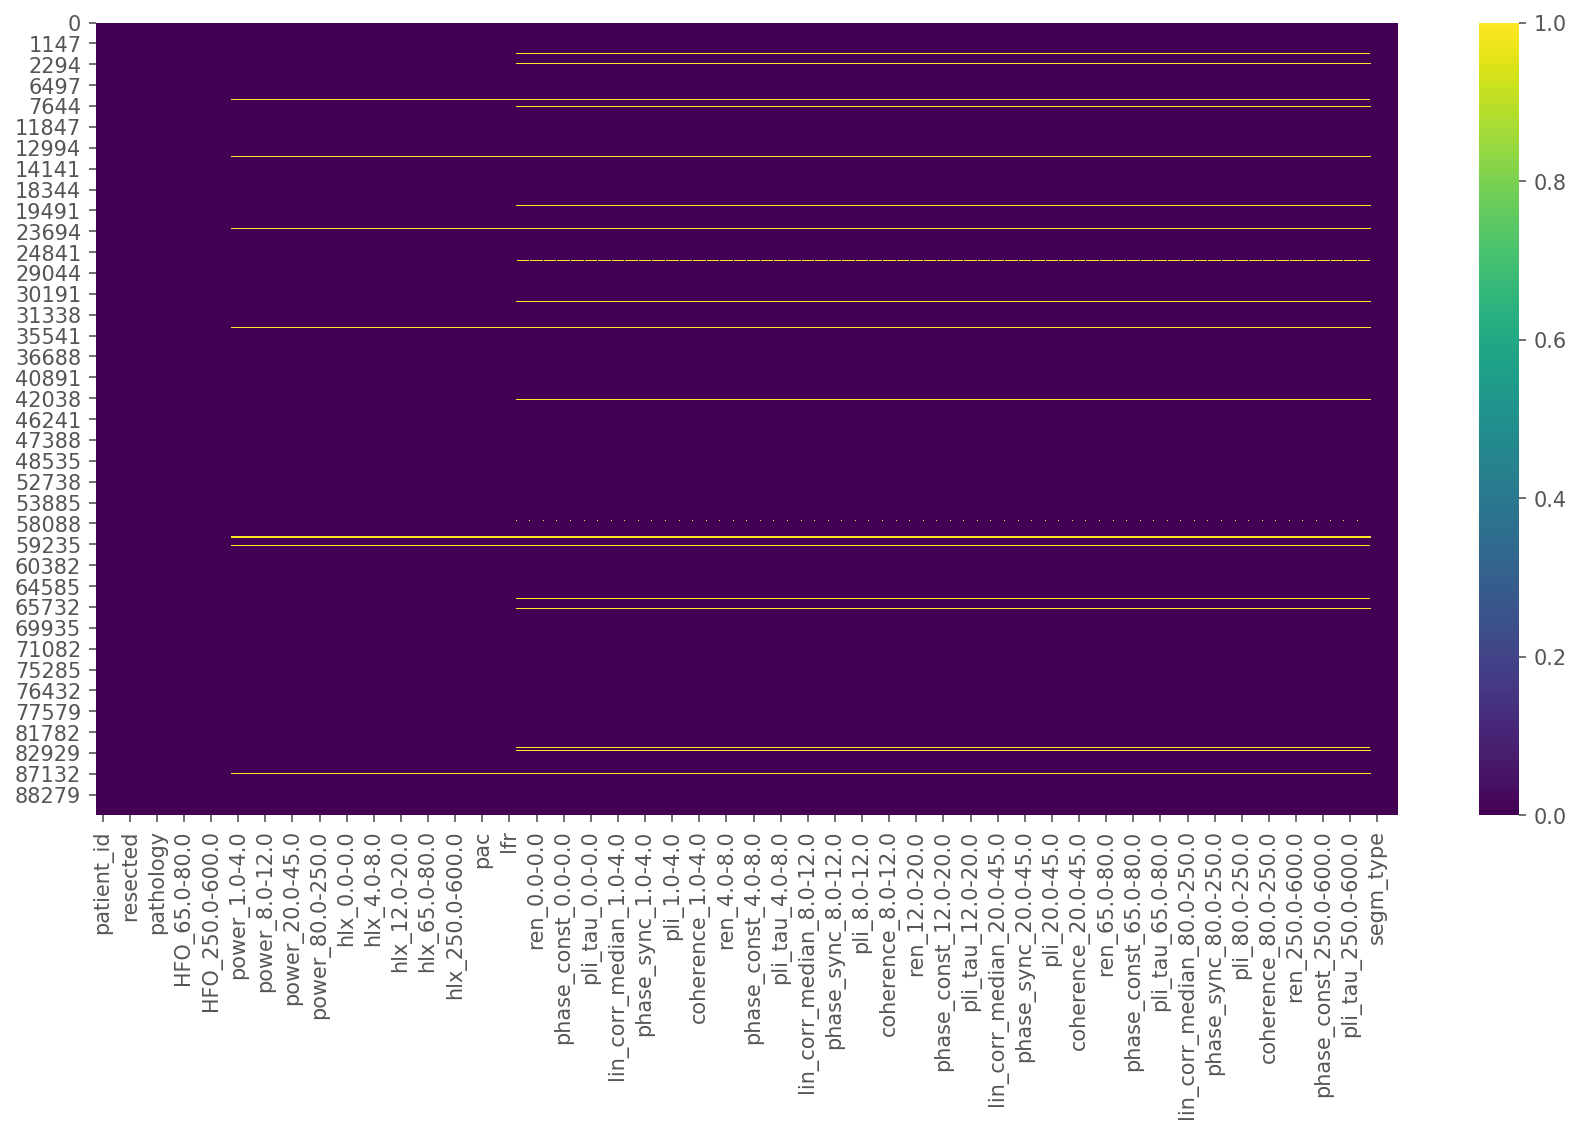

In [30]:
# Show null columns

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [14, 7]
plt.rcParams['figure.dpi'] = 150
sns.heatmap(df_montreal.isnull(), cmap = 'viridis', cbar = True);